# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer, quantile_transform
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, StandardScaler

from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import median_absolute_error, mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Most used car dealerships only deal in cars only that are only so old. We will assume that dealers only want to have cars up 10 years old on the lot, and that it is currently 2022. 

Does where the car is sold effect its value? 

What features of the car most influence the price of car? 

How well those features describe the price of a car?

What kind of cars should a dealership carry? Dealerships are only so big, so there should be a best car to have.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
carsraw = pd.read_csv('data/vehicles.csv') # 

In [ ]:
# First step is just to look of the data fields and categories, to see what can be known, look at info() and describe().

In [4]:
carsraw.info() # We have 18 columns, 5 numeric and 13 categorical, there are lots of missing fields from the non-null counts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
carsraw.describe() # There is a car listed from 1900, not likely useful to the model.

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [6]:
carsraw.sample(5) # Take a random samples to sample examples of all the fields (to get a feel for the data.)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
146781,7302158817,springfield,33999,2018.0,chevrolet,1500,NaN,NaN,gas,65438.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,il
66149,7306405609,stockton,34394,2019.0,ford,ranger lariat,good,NaN,other,1954.0,clean,automatic,1FTER4EH9KLA24896,rwd,NaN,pickup,silver,ca
254843,7313344853,north jersey,9450,2009.0,toyota,rav4,excellent,4 cylinders,gas,88000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,nj
89558,7314991249,"washington, DC",3499,2002.0,honda,civic,good,4 cylinders,gas,137352.0,clean,automatic,1HGEM22972L026311,fwd,NaN,coupe,custom,dc
398604,7308593752,roanoke,48992,2014.0,ford,f450 super duty king ranch,NaN,NaN,diesel,167092.0,clean,automatic,1FT8W4DT6EEB33661,NaN,NaN,NaN,NaN,va


In [ ]:
# Look at lengths, and information in the categories to decide on the encoding type to use for model.

In [ ]:
# Look through the value counts of categories field and look for misspellings/strange data.

In [ ]:
# id is just a number we don't need for the model so will drop it

In [7]:
len(carsraw['region'].unique()) # Large amount of unique values, but this information is also include in the state field (further down), so will drop and not keep in the model.

404

In [ ]:
# price: The price field is our primary target for the model, there are some zeros, and NANs included in the file, will ditch those rows as the will not help with a model.

In [ ]:
# year: Is the model year of the car.

In [8]:
len(carsraw['manufacturer'].unique()) # will use one hot encoding on this category.

43

In [ ]:
len(carsraw['model'].unique()) # will have to binary encode this category because there are so many!

In [9]:
carsraw['condition'].value_counts() # will use one hot encoding on this category.

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [ ]:
(carsraw['cylinders'].unique()) # will convert this to a numeric field

In [10]:
carsraw['fuel'].value_counts() # will use one hot encoding on this category.

gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64

In [12]:
carsraw["title_status"].value_counts() # will use one hot encoding on this category.

clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64

In [11]:
carsraw['transmission'].value_counts() # will use one hot encoding on this category. Wow, mostly automatic.

automatic    336524
other         62682
manual        25118
Name: transmission, dtype: int64

In [ ]:
# VIN: for modeling we don't need the VIN number, so we will drop it.

In [13]:
carsraw['drive'].value_counts() # will use one hot encoding, for this category, strange that are no all-wheel drive cars.

4wd    131904
fwd    105517
rwd     58892
Name: drive, dtype: int64

In [14]:
carsraw['size'].value_counts() # will use one hot encoding on this category.

full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: size, dtype: int64

In [230]:
carsraw['type'].unique() # will use one hot encoding on this category.

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [15]:
(carsraw['paint_color'].value_counts())  # will use one hot encoding on this category.

white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: paint_color, dtype: int64

In [16]:
len(carsraw['state'].unique())  # 51? It includes Washington DC, which isn't a state yet, will use binary encoding for this category.

51

In [ ]:
# Look for one offs (not useful for modeling since there is only one), really old cars will tend to be this way since so few of them are still around.

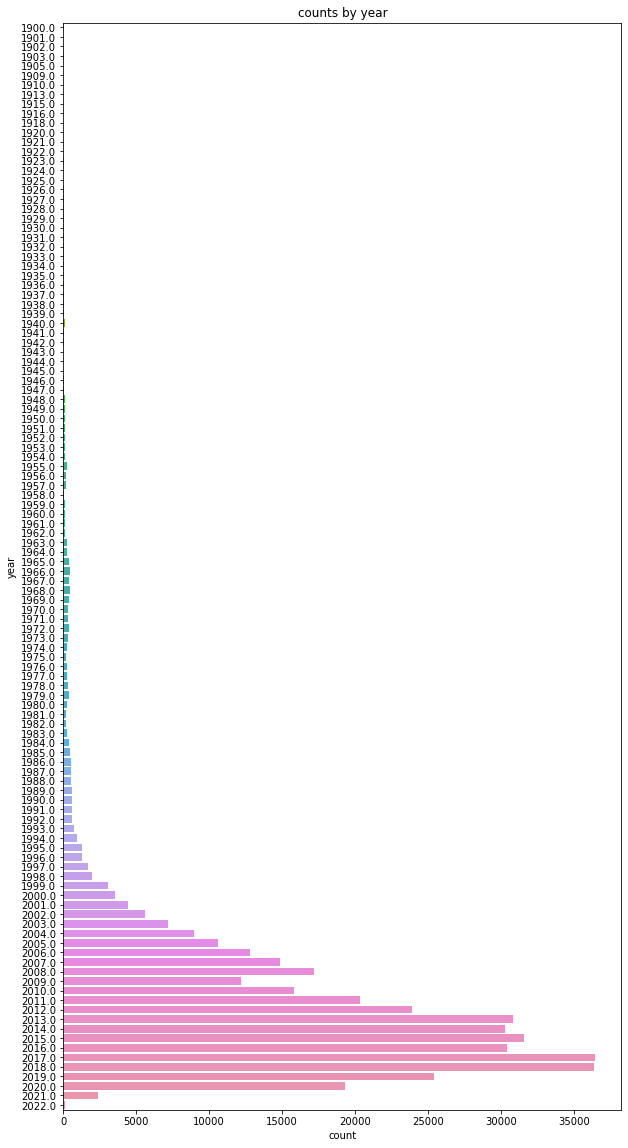

In [17]:
plt.figure(figsize=(10, 20))
plt.title('counts by year')
sns.countplot(y=carsraw['year'])
plt.show()

In [ ]:
# There are some classic cars (more than 20 years old) in the data but not many.

In [ ]:
# The dataset doesn't have any information on availability, which in the last two years has become critical; since new cars have become unavailable the prices of used cars has shot up.

In [ ]:
# The dataset also doesn't tell which year the cars were sold in, just the year of the car.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [138]:
cars = pd.read_csv('data/vehicles.csv') # lots of missing fields.

In [139]:
cars = cars.drop(['id','VIN','region'], axis=1) # We can drop VIN and ID because we don't care about them, Region and state are related, likely only need one of them, so let's 
# keep state and drop region since they cover mostly the same information, and region would have to be binary encoded to use.
cars = cars[cars.year >= (2022-10)] # Car must be from the last 10 years. Remove older cars.
cars = cars[cars.price > 0] # Price of cars can't be zero.
cars = cars[cars.odometer > 0] # Odometer can't be zero, garbage data (even new cars normally have a mile on them.)
cars.loc[cars["transmission"] == "electric", "cylinders"] = '20' # Fix NaN on electric cylinders so we don't drop them. Set to large number to less break model.
cars.loc[(cars["size"].isnull())&(cars["type"] == 'sedan'), "size"] = 'full-size' # Sedans will be considered full-size if data is missing.
cars.loc[(cars["size"].isnull())&(cars["type"] == 'coupe'), "size"] = 'mid-size' # Coupes will be considered mid-size if data is missing.
cars.loc[(cars["size"].isnull())&(cars["type"] == 'van'), "size"] = 'full-size' # Vans will be considered full-size if data is missing.
cars.loc[(cars["type"] == 'pickup'), "type"] = 'truck' # Pickups are just trucks. Removal of sub-type.
cars.loc[(cars["size"].isnull())&(cars["type"] == 'truck'), "size"] = 'full-size' # Trucks of unknown size are full-size.
cars.loc[(cars["size"].isnull())&(cars["type"] == 'SUV'), "size"] = 'full-size' # SUVs of unknown size are full-size.
cars["cylinders"] = cars["cylinders"].str.replace('other','1') # Convert cylinders into a number 1=other.
cars["cylinders"] = cars["cylinders"].str.replace('cylinders',' ') # Convert cylinders into a number 20=electric.
cars['cylinders']=cars['cylinders'].astype(float) # Convert to float.

In [140]:
counts = cars.model.value_counts()
cars = cars.loc[cars['model'].isin(counts.index[counts > 3])] # Remove super rare cars, most dealership won't ever see/get one used anyway and they'd have to be researched on case by case basis.

In [141]:
cars['yearsold'] =  2022-cars['year'] # Convert model year into how many years old the car is.
cars = cars.drop(['year'], axis=1) # We can drop year, we'll just use how old the car is.

In [142]:
cars.sample(5) # Resample after cleanup.

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,yearsold
89716,29995,jeep,wrangler,NaN,NaN,gas,68000.0,clean,automatic,4wd,full-size,SUV,blue,dc,7.0
52598,39980,ram,promaster 2500,NaN,NaN,gas,1216.0,clean,automatic,fwd,full-size,van,white,ca,2.0
29584,50995,ford,f-350 super duty crew cab xlt 6.7 liter,NaN,8.0,other,79630.0,clean,automatic,4wd,full-size,truck,black,ca,6.0
387327,23795,nissan,rogue,excellent,4.0,gas,20023.0,clean,automatic,4wd,mid-size,SUV,black,vt,2.0
253050,7800,kia,optima,good,NaN,gas,35000.0,clean,automatic,NaN,NaN,NaN,custom,nj,9.0


In [143]:
cars["size"].isnull().sum() # Still a lot of bad data even after cleanup. 

67815

In [144]:
complete = cars.copy()

In [145]:
complete = complete.dropna() # Cleanup remaiming NaN fields.

In [146]:
complete.drop(complete[complete['manufacturer'] == "harley-davidson"].index, inplace = True) # Drop one off row!

In [231]:
complete = complete[complete.price > 1000] # Price can't be too low (scrap yard car, normally sent somewhere to either scrapped or be rebuilt.)
complete = complete[complete.price < 100000] # Price can't be too high (elite car, out of normal buyers range.)

In [236]:
complete.describe() # 

,price,cylinders,odometer,yearsold
count,46652.000000,46652.000000,4.665200e+04,46652.000000
mean,22778.549130,5.804296,7.647356e+04,6.592258
std,13106.426038,1.617817,5.510333e+04,2.387652
min,1095.000000,1.000000,1.000000e+00,0.000000
25%,11995.000000,4.000000,3.356600e+04,5.000000
50%,19995.000000,6.000000,7.174500e+04,7.000000
75%,31990.000000,8.000000,1.092592e+05,9.000000
max,99700.000000,12.000000,2.346897e+06,10.000000


In [ ]:
# 46652 record left so plenty of data left to model / test the model on.

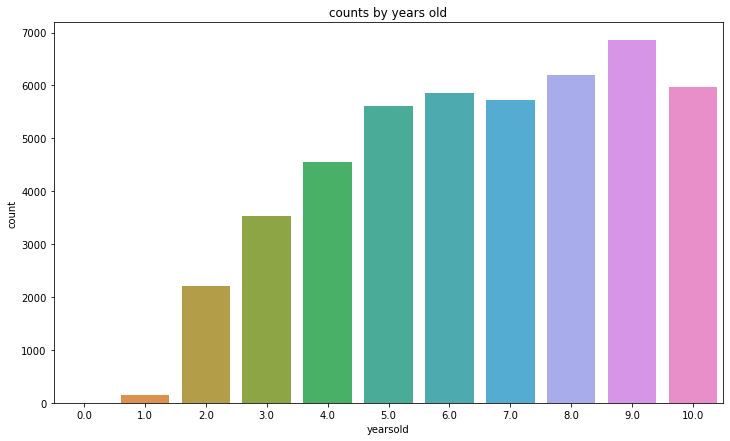

In [237]:
plt.figure(figsize=(12, 7))
plt.title('counts by years old')
sns.countplot(x=complete['yearsold'])
plt.show()

<AxesSubplot:>

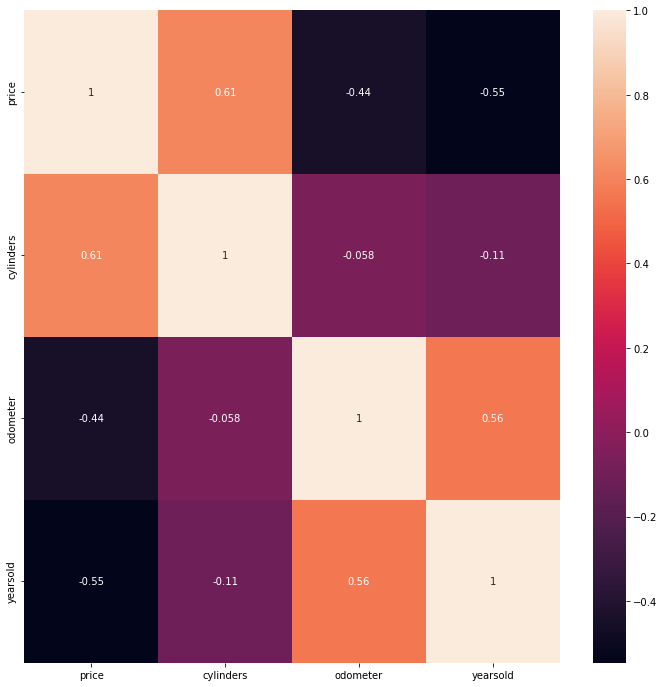

In [238]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(complete.corr(), annot=True) 

In [ ]:
# The heatmap shows that price is moderately correlated positively with cylinders, and moderately negatively correlated with years old, and odometer. 
# We should see those come up in permutation importance.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [151]:
X = complete.drop('price', axis = 1)
y = complete['price']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [153]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11663 entries, 263987 to 414288
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  11663 non-null  object 
 1   model         11663 non-null  object 
 2   condition     11663 non-null  object 
 3   cylinders     11663 non-null  float64
 4   fuel          11663 non-null  object 
 5   odometer      11663 non-null  float64
 6   title_status  11663 non-null  object 
 7   transmission  11663 non-null  object 
 8   drive         11663 non-null  object 
 9   size          11663 non-null  object 
 10  type          11663 non-null  object 
 11  paint_color   11663 non-null  object 
 12  state         11663 non-null  object 
 13  yearsold      11663 non-null  float64
dtypes: float64(3), object(11)
memory usage: 1.3+ MB


In [154]:
cat_hot_columns = ["manufacturer", "condition", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color"] # These columns will One Hot Encoded.
cat_bin_columns = ["model",'state'] # These columns will be Binary Encoded
numerical_columns = ["cylinders", "odometer", "yearsold"] # These columns will be run through the standard scaler.

In [155]:
preprocessor1 = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), cat_hot_columns),
    (ce.BinaryEncoder(), cat_bin_columns), # 
    (StandardScaler(), numerical_columns),
    remainder="drop", # Nothing should be left here.
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)

In [156]:
model = make_pipeline(
    preprocessor1,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10, # alpha=1e-10 
    ),
)

In [173]:
model2 = make_pipeline(
    preprocessor1,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=model_5_best_alpha['ridge__regressor__alpha']), 
        transformer=QuantileTransformer(n_quantiles=10000, output_distribution="normal"), # this model is better
    ),
)

In [162]:
model3 = make_pipeline(
    preprocessor1,
    TransformedTargetRegressor(
        regressor=RandomForestRegressor(), func=np.log10, inverse_func=sp.special.exp10, # best so far 
    ),
)

In [163]:
model4 = make_pipeline(
    preprocessor1,
    TransformedTargetRegressor(
        regressor=RandomForestRegressor(), 
        transformer=QuantileTransformer(n_quantiles=10000, output_distribution="normal"), # second best
    ),
)

In [164]:
model.fit(X_train, y_train)
y_pred1 = model.predict(X_train)

mae = median_absolute_error(y_train, y_pred1)
string_score = f"MAE on training set: {mae:.2f} $PerCar"
y_pred1t = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred1t)
string_score += f"\nMAE on testing set: {mae:.2f} $PerCar"
print(string_score)

MAE on training set: 2737.64 $PerCar
MAE on testing set: 2730.56 $PerCar


Text(0.5, 0, 'Truths')

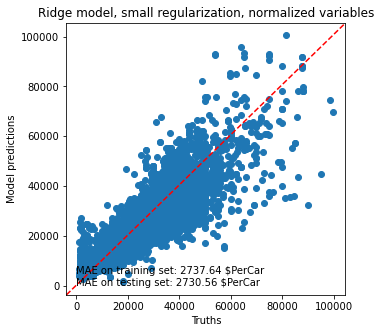

In [165]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred1t)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title("Ridge model, small regularization, normalized variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")

In [166]:
param_dict = {'ridge__regressor__alpha': np.logspace(0, 10, 50)}
grid = ''
model_5_train_mse = ''
model_5_test_mse = ''
model_5_best_alpha = ''

pipe = Pipeline([( 'ridge', TransformedTargetRegressor(regressor=Ridge(), func=np.log10, inverse_func=sp.special.exp10)) ])

grid = GridSearchCV(estimator=pipe, 
                      param_grid=param_dict)
grid_cv = make_pipeline(preprocessor1, grid)
# Grid Search for a better alpha to use in ridge model

grid_cv.fit(X_train, y_train)
y_pred5 = grid_cv.predict(X_train)
model_5_train_mse = mean_squared_error(y_pred5, y_train)
model_5_train_mae = median_absolute_error(y_pred5, y_train)
y_pred5_t = grid_cv.predict(X_test)
model_5_test_mse = mean_squared_error(y_pred5_t, y_test)
model_5_test_mae = median_absolute_error(y_test, y_pred5_t)
model_5_best_alpha = grid.best_params_
string_score = f"MAE on training set: {model_5_train_mae:.2f} $PerCar"
string_score += f"\nMAE on testing set: {model_5_test_mae:.2f} $PerCar"
print(string_score)
print(model_5_best_alpha)

MAE on training set: 2739.39 $PerCar
MAE on testing set: 2731.39 $PerCar
{'ridge__regressor__alpha': 1.0}


In [167]:
# Grid Search found a better alpha to use of 1.0 inserted that into model2, which improved it, but still not better than model3/4

In [174]:
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_train)

mae = median_absolute_error(y_train, y_pred2)
string_score = f"MAE on training set: {mae:.2f} $PerCar"
y_pred2t = model2.predict(X_test)
mae = median_absolute_error(y_test, y_pred2t)
string_score += f"\nMAE on testing set: {mae:.2f} $PerCar"
print(string_score)

MAE on training set: 2600.00 $PerCar
MAE on testing set: 2610.00 $PerCar


Text(0.5, 0, 'Truths')

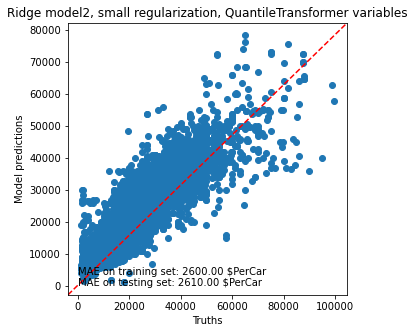

In [175]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred2t)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title("Ridge model2, small regularization, QuantileTransformer variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")

In [ ]:
# model2 improves apon the first model, and nether of them is overfit, from the training/test split validation Training/Test are about the same.

In [176]:
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_train)

mae = median_absolute_error(y_train, y_pred3)
string_score = f"MAE on training set: {mae:.2f} $PerCar"
y_pred3t = model3.predict(X_test)
mae = median_absolute_error(y_test, y_pred3t)
string_score += f"\nMAE on testing set: {mae:.2f} $PerCar"
print(string_score)

MAE on training set: 262.90 $PerCar
MAE on testing set: 704.33 $PerCar


Text(0.5, 0, 'Truths')

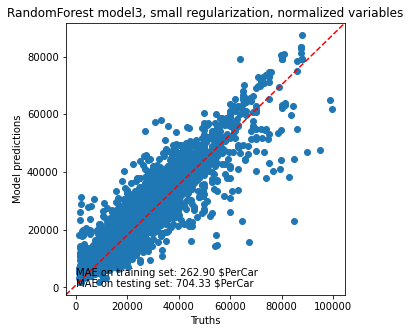

In [177]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred3t)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title("RandomForest model3, small regularization, normalized variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")

In [ ]:
# Model3 is a vast improvement on the first two models with MAE of 704.33 on the test set.

In [178]:
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_train)

mae = median_absolute_error(y_train, y_pred4)
string_score = f"MAE on training set: {mae:.2f} $PerCar"
y_pred4t = model4.predict(X_test)
mae = median_absolute_error(y_test, y_pred4t)
string_score += f"\nMAE on testing set: {mae:.2f} $PerCar"
print(string_score)

MAE on training set: 230.01 $PerCar
MAE on testing set: 795.00 $PerCar


Text(0.5, 0, 'Truths')

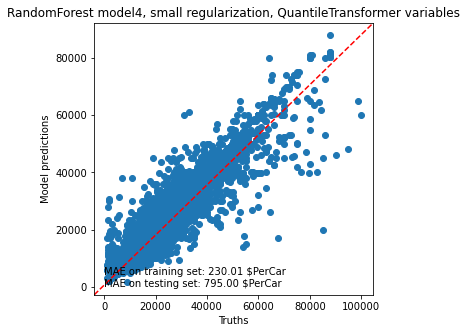

In [179]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred4t)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title("RandomForest model4, small regularization, QuantileTransformer variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")

In [ ]:
# Model4 is better than the first two models, but not as good as Model3 so we'll use model3 tuned (see below) for the Evaluation.

In [180]:
param_dict = {'forest__regressor__n_estimators': [1, 10, 50, 100, 200]}
grid2 = ''
model_3_train_mse = ''
model_3_test_mse = ''
model_3_best_alpha = ''

pipe2 = Pipeline([( 'forest', TransformedTargetRegressor(regressor=RandomForestRegressor(), func=np.log10, inverse_func=sp.special.exp10)) ])

grid2 = GridSearchCV(estimator=pipe2, 
                      param_grid=param_dict)
grid2_cv = make_pipeline(preprocessor1, grid2)
# Grid Search for a better n_estimaotr to use in RandomForestRegressor model

grid2_cv.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'condition',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color']),
                                                 ('binaryencoder',
                                                  BinaryEncoder(),
                                                  ['model', 'state']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['cylinders', 'odometer',
                             

In [183]:
y_pred3cv = grid2_cv.predict(X_train)
model_3_train_mse = mean_squared_error(y_pred3cv, y_train)
model_3_train_mae = median_absolute_error(y_pred3cv, y_train)
y_predcv_t = grid2_cv.predict(X_test)
model_3_test_mse = mean_squared_error(y_predcv_t, y_test)
model_3_test_mae = median_absolute_error(y_test, y_predcv_t)
model_3_best_alpha = grid2.best_params_
string_score = f"MAE on training set: {model_3_train_mae:.2f} $PerCar"
string_score += f"\nMAE on testing set: {model_3_test_mae:.2f} $PerCar"
print(string_score)
print(model_3_best_alpha)
r2_score(y_test, y_predcv_t)

MAE on training set: 259.27 $PerCar
MAE on testing set: 689.16 $PerCar
{'forest__regressor__n_estimators': 200}


0.9136486217484321

In [ ]:
# Turning the n_estimator to 200 improved model 3 to MAE 689.16.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Let's look at permutation importance next.

In [234]:
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(
    grid2_cv, X_test, y_test, n_repeats=30, random_state=0, scoring=scoring)

for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        #if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"    {X_test.columns[i]:<8} " #
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")

r2
    cylinders 0.460 +/- 0.009
    odometer 0.308 +/- 0.005
    yearsold 0.261 +/- 0.005
    fuel     0.132 +/- 0.002
    drive    0.113 +/- 0.003
    type     0.110 +/- 0.003
    manufacturer 0.068 +/- 0.002
    model    0.040 +/- 0.001
    condition 0.017 +/- 0.001
    title_status 0.016 +/- 0.001
    paint_color 0.010 +/- 0.001
    transmission 0.007 +/- 0.000
    state    0.004 +/- 0.000
    size     0.003 +/- 0.000
neg_mean_absolute_percentage_error
    cylinders 0.222 +/- 0.004
    odometer 0.187 +/- 0.002
    yearsold 0.160 +/- 0.002
    drive    0.098 +/- 0.002
    type     0.075 +/- 0.002
    manufacturer 0.060 +/- 0.001
    model    0.042 +/- 0.000
    fuel     0.030 +/- 0.001
    condition 0.017 +/- 0.000
    paint_color 0.016 +/- 0.000
    title_status 0.015 +/- 0.000
    state    0.009 +/- 0.000
    size     0.009 +/- 0.000
    transmission 0.008 +/- 0.000
neg_mean_squared_error
    cylinders 81256413.379 +/- 1504202.515
    odometer 54317653.513 +/- 917292.643
    years

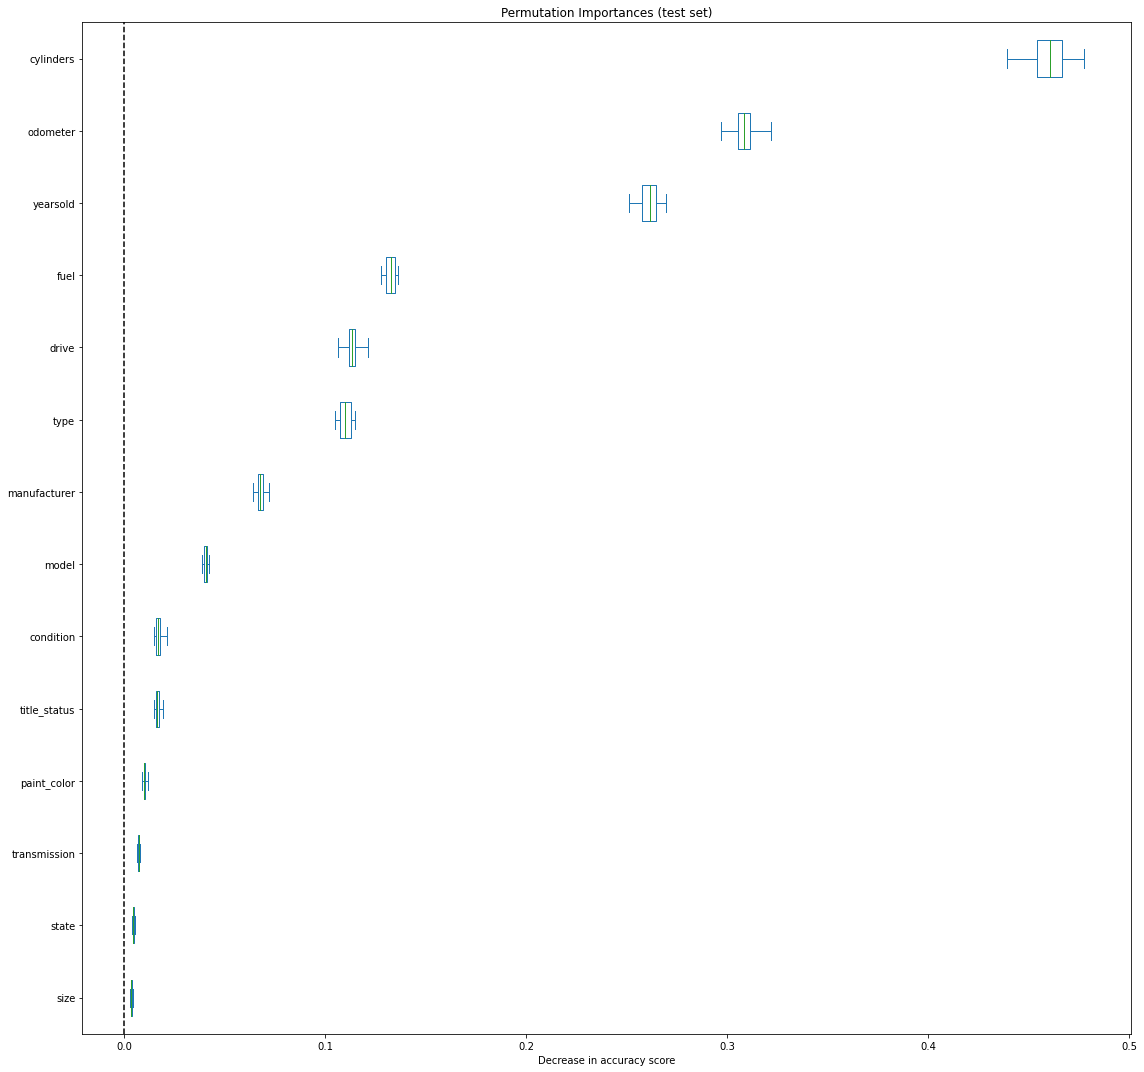

In [235]:
result_test = permutation_importance(grid2_cv, X_test, y_test, n_repeats=30, random_state=0)
sorted_importances_idx3 = result_test.importances_mean.argsort()
importances_test = pd.DataFrame(
    result_test.importances[sorted_importances_idx3].T,
    columns=X_train.columns[sorted_importances_idx3], 
)
ax = importances_test.plot.box(vert=False, whis=10, figsize=(16,15))

ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
# Findings: How many big the engine is (by how many cylinders it has) dominates how valuable a car is, followed by how many miles on are it, 
# followed by how many years old it is, followed by fuel.
# This matches well with the correlation between the numeric data and the price.

In [206]:
completev2 = cars.copy()

In [207]:
completev2 = completev2.dropna() # will have to kick out one's in NANs 

In [208]:
completev2 = completev2.drop(['state','model','size', "transmission"], axis=1) # We can drop state, size, transmission because 
# they did not effect results much. Column model is also dropped because it was less important than manufacturer and generally was making the model hard to use.
completev2.drop(completev2[completev2['manufacturer'] == "harley-davidson"].index, inplace = True) # drop one off value!

In [209]:
completev2 = completev2[completev2.price > 1000] # Price can't be too low (scrap yard car, normally sent somewhere to either scrapped or be rebuilt.)
completev2 = completev2[completev2.price < 100000] # Price can't be too high (elite car, out of normal buyers range.)

In [210]:
X2 = completev2.drop('price', axis = 1)
y2 = completev2['price']

In [211]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state = 42)

In [212]:
cat_hot_columns2 = ["manufacturer", "condition", "fuel", "title_status", "drive", "type", "paint_color"] # These columns will One Hot Encoded.
numerical_columns2 = ["cylinders", "odometer", "yearsold"] # These columns will be run through the standard scaler.

In [213]:
preprocessor3 = make_column_transformer( # No binary encoding used this time so we can get feature names out.
    (OneHotEncoder(drop="if_binary"), cat_hot_columns2),
    (StandardScaler(), numerical_columns2),
    remainder="drop",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)

In [214]:
model6 = make_pipeline(
    preprocessor3,
    TransformedTargetRegressor(
        regressor=RandomForestRegressor(n_estimators=200), func=np.log10, inverse_func=sp.special.exp10, # best of the tested models
    ),
)

In [216]:
model6.fit(X_train2, y_train2)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'condition',
                                                   'fuel', 'title_status',
                                                   'drive', 'type',
                                                   'paint_color']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['cylinders', 'odometer',
                                                   'yearsold'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<uf

In [218]:
y_pred6 = model6.predict(X_train2)
mae = median_absolute_error(y_train2, y_pred6)
mse = mean_squared_error(y_train2, y_pred6)
string_score = f"MAE on training set: {mae:.2f} $PerCar"
string_score_mse = f"MSE on training set: {mse:.2f} $PerCar"

y_pred6t = model6.predict(X_test2)
mae_t = median_absolute_error(y_test2, y_pred6t)
mse_t = mean_squared_error(y_test2, y_pred6t)
string_score += f"\nMAE on testing set: {mae_t:.2f} $PerCar"
string_score_mse += f"\nMSE on testing set: {mse_t:.2f} $PerCar"

print(string_score_mse)
print(string_score)
r2_score(y_test2, y_pred6t)

MSE on training set: 2375032.14 $PerCar
MSE on testing set: 15628869.49 $PerCar
MAE on training set: 244.28 $PerCar
MAE on testing set: 634.47 $PerCar


0.9114596213094673

Text(0.5, 0, 'Truths')

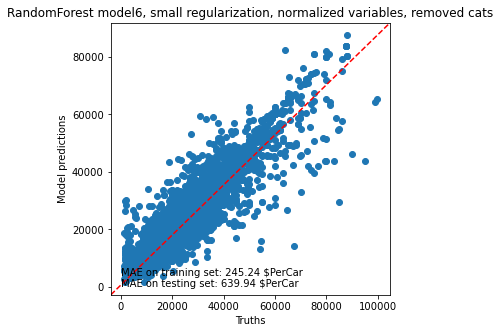

In [220]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test2, y_pred6t)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title("RandomForest model6, small regularization, normalized variables, removed cats")
plt.ylabel("Model predictions")
plt.xlabel("Truths")

In [221]:
# Model6 is predicting slightly better than model3, but still in the same range, it is also a slightly larger training/test set with a MAE of 634.47 on the test set. 
# It has a 91% accuracy score at predictions which is fairly good.

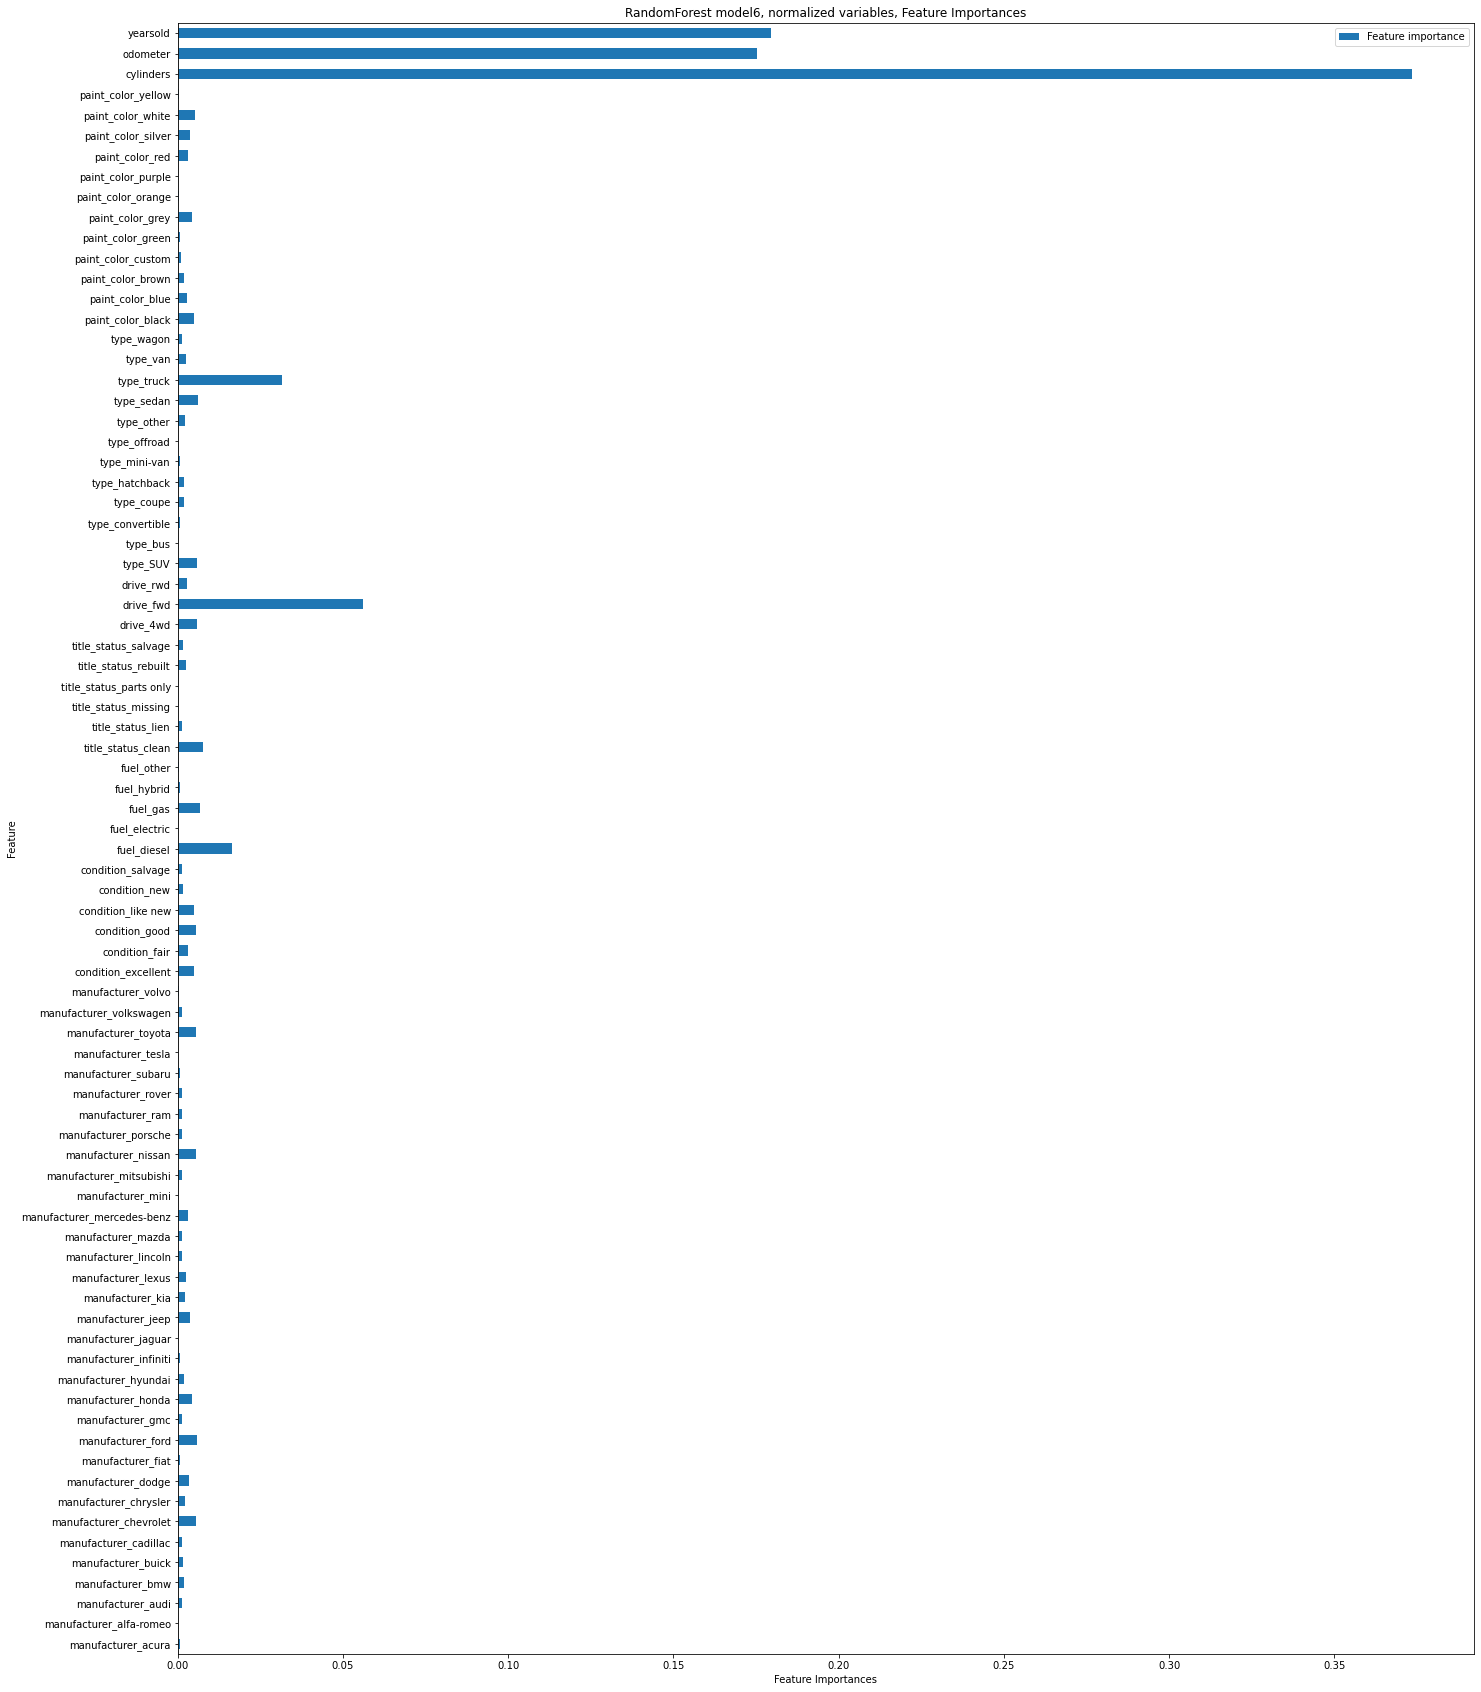

In [222]:
feature_names6 = model6[:-1].get_feature_names_out() 
fis = pd.DataFrame(
    model6[-1].regressor_.feature_importances_,
    columns=["Feature importance"],
    index=feature_names6,
)
fis.plot(kind="barh", figsize=(30, 30))
plt.title("RandomForest model6, normalized variables, Feature Importances")
plt.ylabel("Feature")
plt.xlabel("Feature Importances")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [224]:
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(
    model6, X_test2, y_test2, n_repeats=30, random_state=0, scoring=scoring)

for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        #if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"    {X_train2.columns[i]:<8} " # 
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")

r2
    cylinders 0.463 +/- 0.009
    odometer 0.321 +/- 0.005
    yearsold 0.275 +/- 0.005
    fuel     0.132 +/- 0.002
    type     0.122 +/- 0.003
    drive    0.116 +/- 0.003
    manufacturer 0.087 +/- 0.003
    condition 0.059 +/- 0.002
    paint_color 0.023 +/- 0.001
    title_status 0.019 +/- 0.001
neg_mean_absolute_percentage_error
    cylinders 0.225 +/- 0.004
    odometer 0.196 +/- 0.002
    yearsold 0.169 +/- 0.002
    drive    0.099 +/- 0.002
    type     0.084 +/- 0.002
    manufacturer 0.076 +/- 0.001
    condition 0.032 +/- 0.001
    fuel     0.031 +/- 0.001
    paint_color 0.029 +/- 0.001
    title_status 0.017 +/- 0.001
neg_mean_squared_error
    cylinders 81766995.265 +/- 1609596.800
    odometer 56623633.102 +/- 929951.771
    yearsold 48527506.810 +/- 890106.190
    fuel     23248057.172 +/- 433250.403
    type     21487555.518 +/- 545386.727
    drive    20397428.345 +/- 468785.396
    manufacturer 15286644.240 +/- 441307.104
    condition 10342743.671 +/- 350185.87

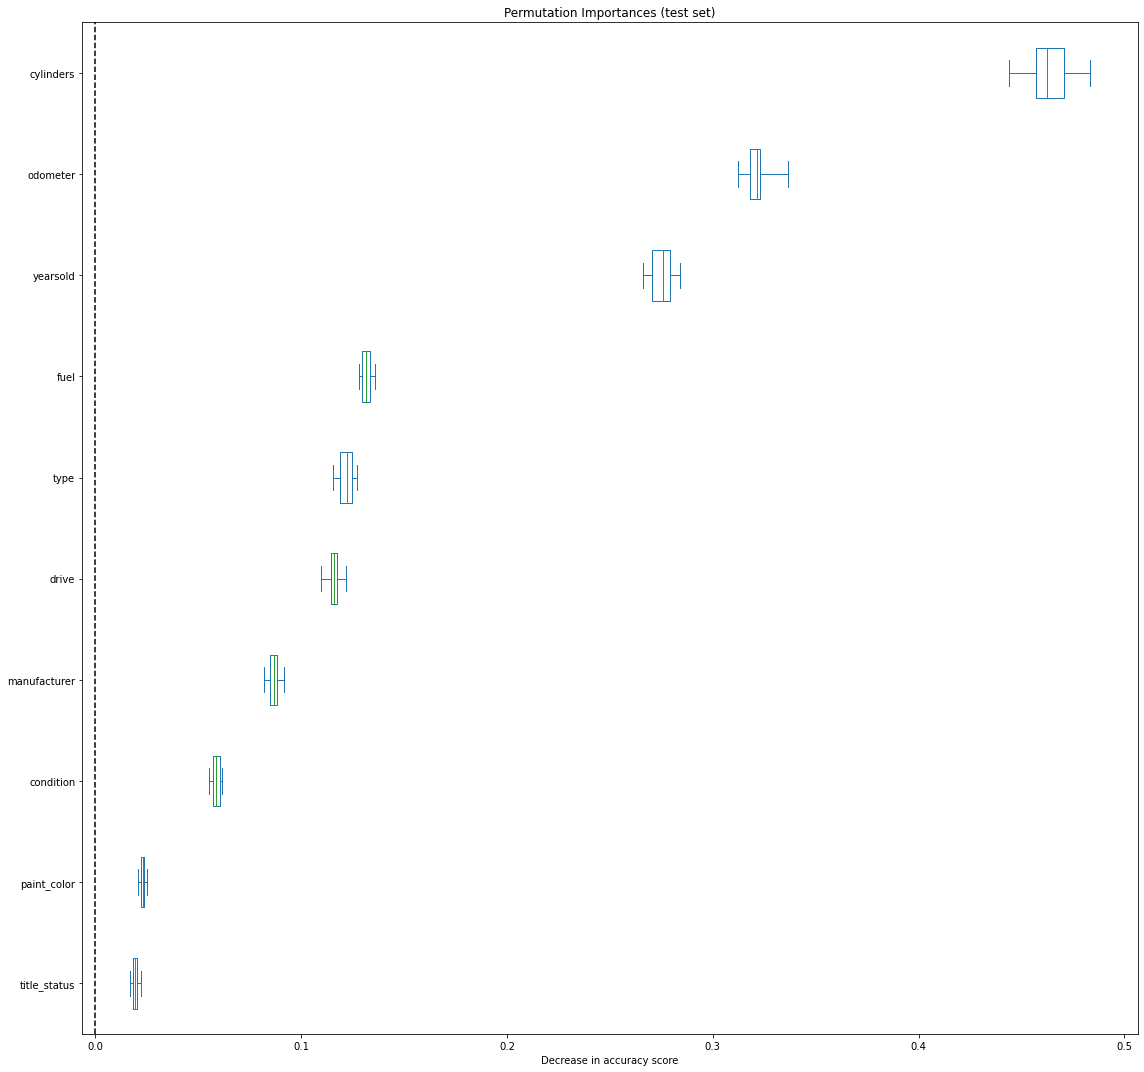

In [225]:
result_test = permutation_importance(model6, X_test2, y_test2, n_repeats=30, random_state=0)
sorted_importances_idx6 = result_test.importances_mean.argsort()
importances_test = pd.DataFrame(
    result_test.importances[sorted_importances_idx6].T,
    columns=X_train2.columns[sorted_importances_idx6], #
)
ax = importances_test.plot.box(vert=False, whis=10, figsize=(16,15))
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
# How many big the engine is (by how many cylinders it has) dominates how valuable a car is, followed by how many miles on are it, 
# followed by how many years old it is, followed by fuel, type, drive, manufacturer, condition and paint_color and title_status.

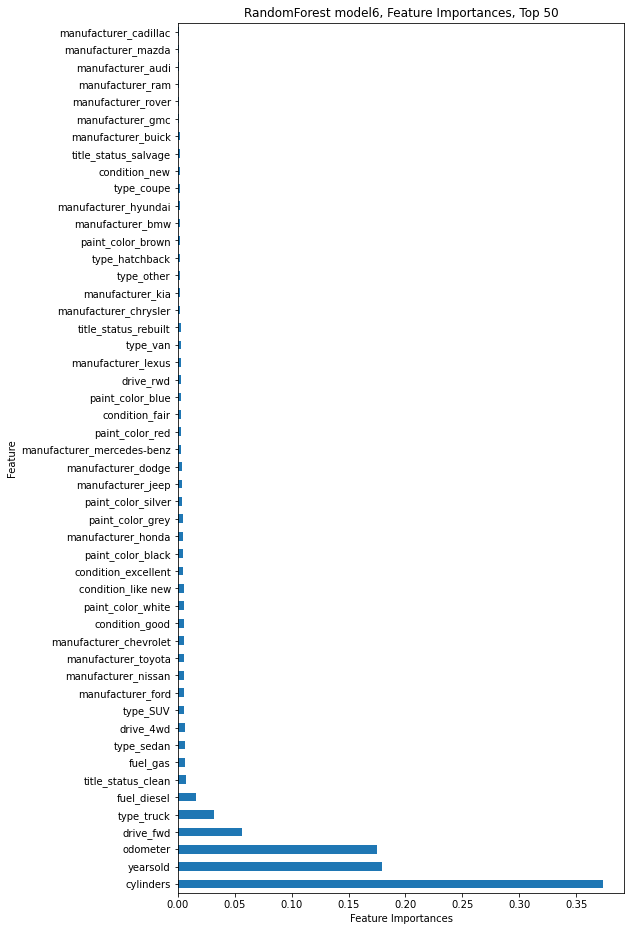

In [227]:
plt.figure(figsize = (8,16))
plt.title("RandomForest model6, Feature Importances, Top 50")
plt.ylabel("Feature")
plt.xlabel("Feature Importances")
feat_importances = pd.Series(model6[-1].regressor_.feature_importances_, index=feature_names6)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

What state you sell the car in doesn't change the price of the car.

The features that make cars worth more (listed most important first):
	Large Engines, with lots of cylinders 
	Newer (Model Year)
	Low mileage 
	Fuel Type (in the listed order):
		Diesel, Gasoline
	Type of car (in the listed order):
		Trucks, sedan, SUV
	Drive Type:
		Fwd, 4wd
	With Clean Titles
	From Ford, Nissan, Toyota, Chevrolet, Honda
	The car's condition (in listed order):
		good, like new, excellent. (So good is good enough.) 
	Paint Colors (in the listed order):
		White, Black, Grey, Silver

So stock your lot with; Recent, low mileage Trucks, (from Ford/Nissan/Toyota) with large diesel engines (V8s,V10s,V12s) in White/Black/Grey/Silver and those fetch the largest selling prices.

Remember you stand to make a killing on used cars, until production/supply chains on new cars get back to normal, which still make take a year or more. Availably is your customers’ biggest problem right now, which has been slowly getting better. So charge more while you still can.

Next steps for a better analysis:

Get data on availability of cars (including new). How scare cars currently are can and will affect pricing.

Get date of sales, so trends in features can be observed.

Get cleaner data, no reason to have such mangled data on the sale of cars in 2022.

Break the model column into more columns. It contained more than one feature to it, it contained both the model name, and model features (like 4x4 or hatchback)

Get a dataset with more features, we have a really limited set of car features, like ABS, adaptive cruise control and stuff like that.